In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [11]:
x = torch.randn(500, 10)
y = torch.randn(500 , 1)

In [12]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(10 , 12)
    self.layer2 = nn.Linear(12 , 5)
    self.layer3 = nn.Linear(5 , 3)
    self.output = nn.Linear(3 , 1)

  def forward(self , x)  :
    z = self.layer1(x)
    a = torch.relu(z)

    z1 = self.layer2(a)
    a1 = torch.relu(z1)

    z2 = self.layer3(a1)
    a2 = torch.relu(z2)

    zfinal = self.output(a2)
    afinal = zfinal

    return afinal

In [13]:
model = NeuralNetwork()
loss_func = nn.MSELoss()
optimizer = optim.Adam(model.parameters() , lr=0.01)

losses = []
for epoch in range(300):

  predictions = model(x)
  loss = loss_func(predictions , y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  losses.append(loss.item())

  if epoch % 50 == 0 :
    print(f"epoch {epoch} | loss : {loss.item():.3f}")  

epoch 0 | loss : 1.402
epoch 50 | loss : 0.983
epoch 100 | loss : 0.874
epoch 150 | loss : 0.726
epoch 200 | loss : 0.651
epoch 250 | loss : 0.632


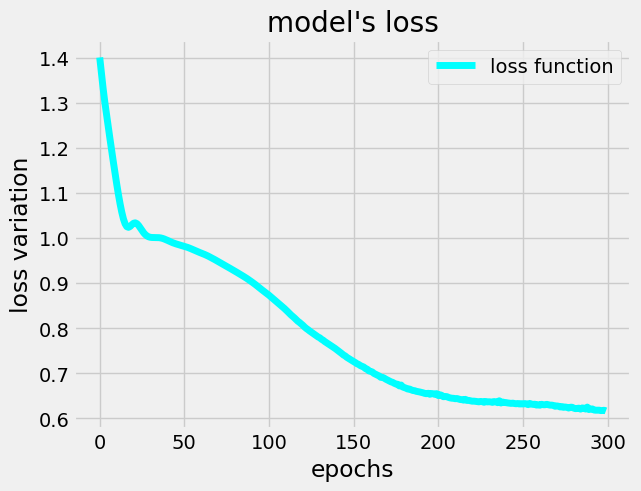

In [14]:
length = len(losses)
plt.style.use("fivethirtyeight")
plt.plot(range(length) , losses , label ='loss function' , c='cyan' , linewidth = 5)
plt.xlabel("epochs")
plt.ylabel("loss variation")
plt.title("model's loss")
plt.legend()
plt.grid(True)
plt.show()

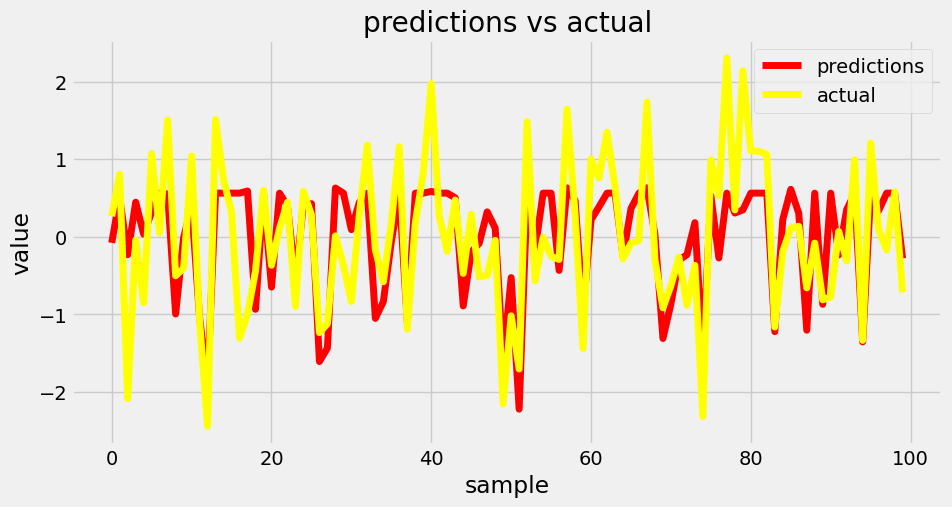

In [15]:
with torch.no_grad():
  preds = model(x)
  
plt.style.use("fivethirtyeight")
plt.figure(figsize = (10 , 5))  
plt.plot(preds[:100] , label = 'predictions' , c='red' , linewidth=5)
plt.plot(y[:100] , label = 'actual' , c='yellow' , linewidth=5)
plt.xlabel('sample')
plt.ylabel('value')
plt.title("predictions vs actual")
plt.legend()
plt.show()

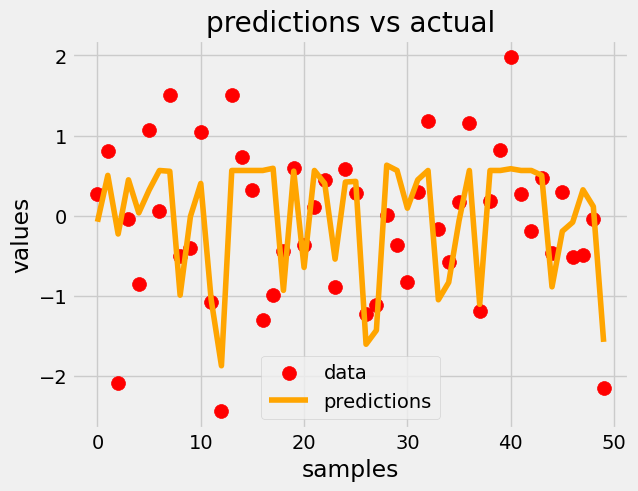

In [16]:
plt.scatter(range(50) , y[:50].numpy() , c='red' , s=100 , label='data')
plt.plot(range(50) , preds[:50].numpy() , c='orange' , label='predictions')
plt.xlabel("samples")
plt.ylabel("values")
plt.title("predictions vs actual")
plt.legend()
plt.show()

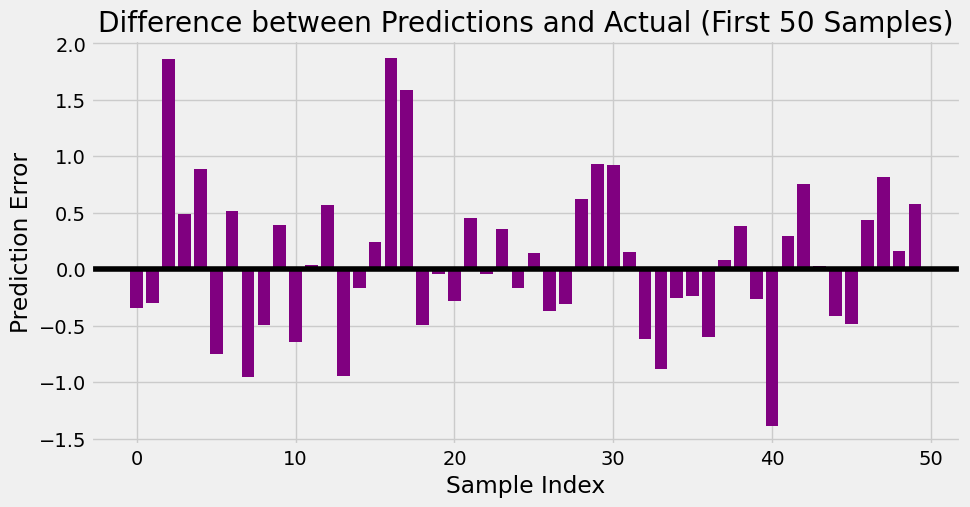

In [17]:
errors = preds[:50] - y[:50]   
errors = errors.detach().numpy()

plt.figure(figsize=(10, 5))
plt.bar(range(50), errors.flatten(), color='purple')
plt.axhline(0, color='black', linestyle='-') 
plt.xlabel("Sample Index")
plt.ylabel("Prediction Error")
plt.title("Difference between Predictions and Actual (First 50 Samples)")
plt.grid(True)
plt.show()


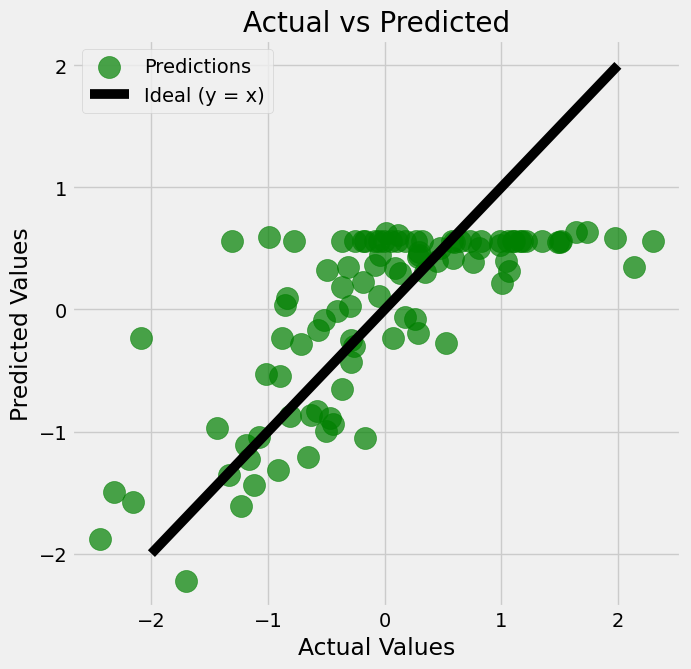

In [18]:
y_true = y[:100].numpy()
y_pred = preds[:100].detach().numpy() 

plt.figure(figsize=(7, 7))
plt.scatter(y_true, y_pred, color='green', alpha=0.7, label='Predictions' ,s=250)
plt.plot([-2, 2], [-2, 2], 'black', label='Ideal (y = x)' , linewidth=7)  
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()
